In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

data=np.load('data.npy')
target=np.load('target.npy')

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

print(model.evaluate(test_data,test_target))

Using TensorFlow backend.




Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 105s 106ms/step - loss: 0.7506 - accuracy: 0.5465 - val_loss: 0.6113 - val_accuracy: 0.6331
Epoch 2/20
990/990 [==============================] - 100s 101ms/step - loss: 0.5162 - accuracy: 0.7273 - val_loss: 0.4570 - val_accuracy: 0.7218
Epoch 3/20
990/990 [==============================] - 104s 105ms/step - loss: 0.3183 - accuracy: 0.8646 - val_loss: 0.2806 - val_accuracy: 0.8911
Epoch 4/20
990/990 [==============================] - 101s 102ms/step - loss: 0.2100 - accuracy: 0.9212 - val_loss: 0.2768 - val_accuracy: 0.8952
Epoch 5/20
990/990 [==============================] - 101s 102ms/step - loss: 0.1459 - accuracy: 0.9535 - val_loss: 0.2054 - val_accuracy: 0.9194
Epoch 6/20
990/990 [==============================] - 106s 107ms/step - loss: 0.1573 - accuracy: 0.9394 - val_loss: 0.2049 - val_accuracy: 0.9194
Epoch 7/20
990/990 [==============================] - 105s 106ms/step - loss

In [4]:
from matplotlib import pyplot as plt


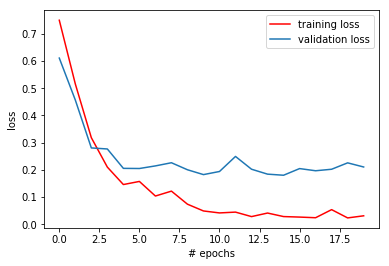

In [5]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

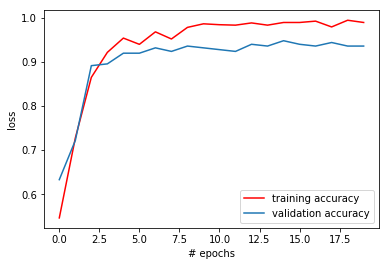

In [3]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()